In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the past 60 day stock price.

In [4]:
#Import the libraries
import math
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#Get the stock quote

stock_name = "TSLA"
start = datetime.strptime('2000-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-07-15', '%Y-%m-%d')
yf.pdr_override()

df = pdr.get_data_yahoo(stock_name, start, end)

#Show the data 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300


In [6]:
#Get the number of rows and columns in the data set
df.shape

(3032, 6)

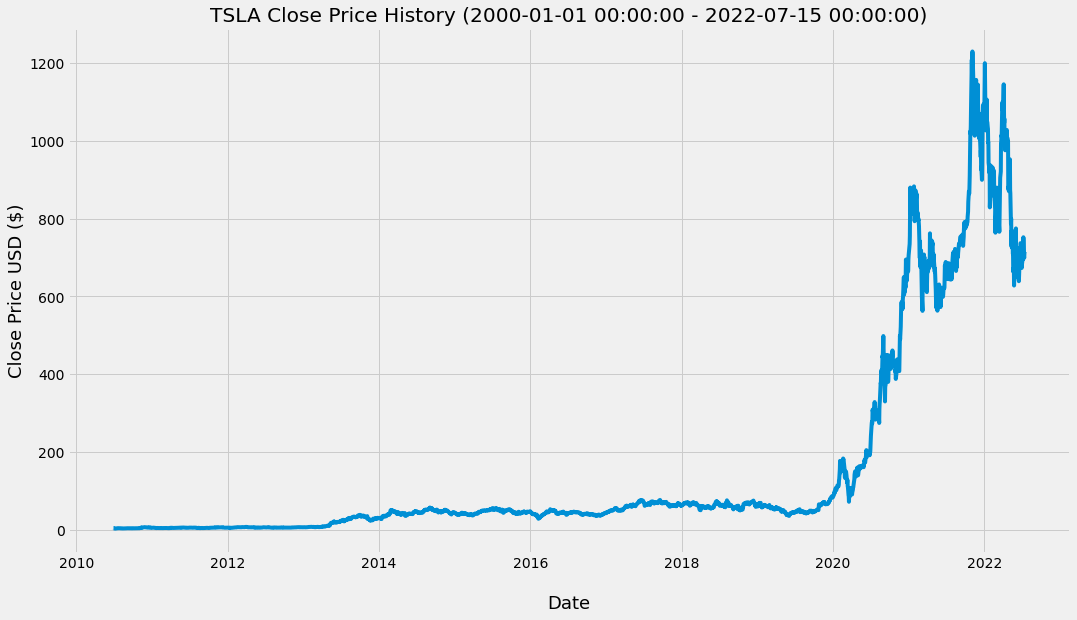

In [7]:
#Visualize the closing price history
plt.figure(figsize=(16,9))
plt.title('{} Close Price History ({} - {})'.format(stock_name, start, end))
plt.plot(df['Close'])
plt.xlabel('\nDate',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [8]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.90)

training_data_len

2729

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.56739352],
       [0.57710208],
       [0.580216  ]])

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893193e-03, 1.30914992e-03, 1.00427966e-03, 5.54310014e-04,
       5.05398786e-05, 0.00000000e+00, 2.70633795e-04, 2.60851783e-04,
       2.03790498e-04, 3.81495759e-04, 6.58650766e-04, 6.66802378e-04,
       7.89076560e-04, 9.96127858e-04, 7.33645675e-04, 7.20603251e-04,
       8.47768245e-04, 8.95047712e-04, 8.39616827e-04, 7.74403930e-04,
       8.02119373e-04, 7.41797482e-04, 6.74953990e-04, 8.34725821e-04,
       1.00264907e-03, 8.90156706e-04, 7.58100706e-04, 6.17892705e-04,
       6.19523105e-04, 5.26594571e-04, 3.42367904e-04, 2.93458231e-04,
       4.10841601e-04, 4.85836511e-04, 5.46158402e-04, 4.84206111e-04,
       4.87466717e-04, 5.38006790e-04, 7.05930233e-04, 5.54310014e-04,
       6.68432778e-04, 6.43977942e-04, 6.35826329e-04, 6.63541772e-04,
       5.99959081e-04, 7.58100706e-04, 8.57550257e-04, 8.55920051e-04,
       7.72773336e-04, 8.31465021e-04, 8.00489167e-04, 7.12451445e-04,
       8.02119373e-04, 8.67332270e-04, 1.00754008e-03, 8.37986621e-04,
     

In [11]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2669, 60, 1)

In [13]:
from keras.backend import dropout
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
84/84 [==============================] - 19s 132ms/step - loss: 0.0022
Epoch 2/100
84/84 [==============================] - 12s 141ms/step - loss: 6.9635e-04
Epoch 3/100
84/84 [==============================] - 13s 156ms/step - loss: 6.5243e-04
Epoch 4/100
84/84 [==============================] - 11s 128ms/step - loss: 5.7964e-04
Epoch 5/100
84/84 [==============================] - 11s 126ms/step - loss: 4.8637e-04
Epoch 6/100
84/84 [==============================] - 11s 130ms/step - loss: 4.9897e-04
Epoch 7/100
84/84 [==============================] - 11s 136ms/step - loss: 6.8065e-04
Epoch 8/100
84/84 [==============================] - 11s 126ms/step - loss: 5.3197e-04
Epoch 9/100
84/84 [==============================] - 13s 150ms/step - loss: 5.5246e-04
Epoch 10/100
84/84 [==============================] - 11s 128ms/step - loss: 4.3056e-04
Epoch 11/100
84/84 [==============================] - 11s 129ms/step - loss: 4.3952e-04
Epoch 12/100
84/84 [=========================

In [16]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [18]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [19]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [20]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

87.65524969830494

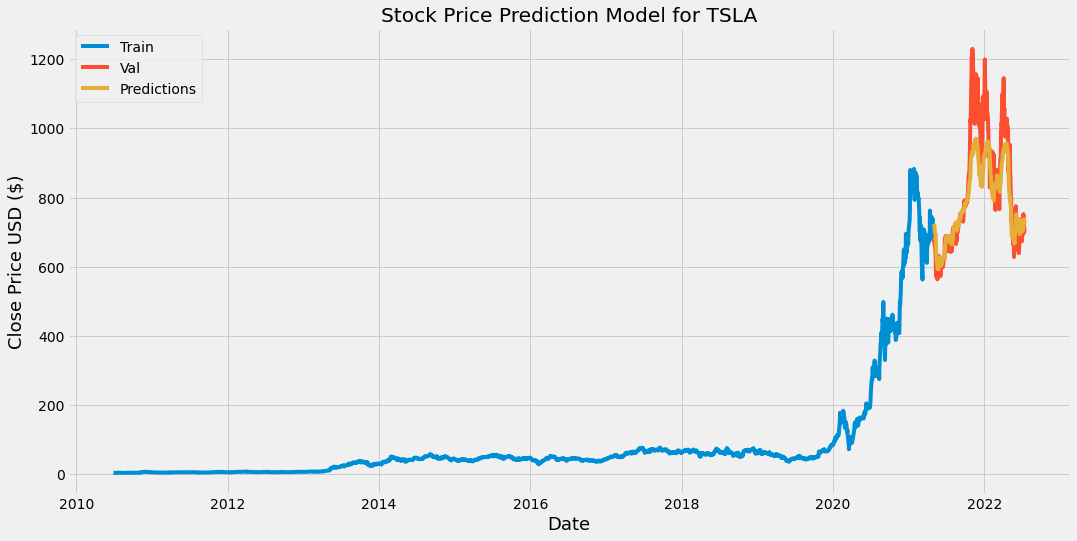

In [21]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Model for {}'.format(stock_name))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-03,684.900024,723.668762
2021-05-04,673.599976,720.942078
2021-05-05,670.940002,714.390076
2021-05-06,663.539978,707.056519
2021-05-07,672.369995,699.396729
...,...,...
2022-07-08,752.289978,722.383850
2022-07-11,703.030029,736.964844
2022-07-12,699.210022,734.877441


In [25]:
Test_stock_name = "TSLA"
Test_start = datetime.strptime('2000-01-01', '%Y-%m-%d')
Test_end = datetime.strptime('2022-07-16', '%Y-%m-%d')
yf.pdr_override()

#Get the quote
quote = pdr.get_data_yahoo(Test_stock_name, Test_start, Test_end)

#Create a new dataframe
new_df = quote.filter(['Close'])

#Get the last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print("Tomorrow's Closing Price will be " , pred_price)

[*********************100%***********************]  1 of 1 completed
Tomorrow's Closing Price will be  [[727.6782]]
